In [1]:
import graph
import random
import params
import group
import edge
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import collections
%matplotlib inline

/Users/erinellefsen/PycharmProjects/Summer2015env/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


im going
im going
im going
im going
im going
{0.0: 0.17391304347826086, 0.5: 0.7777777777777778, 2.0: 1.0, 4.0: 1.0, 2.5: 1.0, 1.0: 0.9811320754716981, 4.5: 1.0, 3.5: 1.0, 1.5: 1.0}
im going
im going
im going
im going
im going
{0.0: 0.0, 0.5: 0.38636363636363635, 2.0: 0.9649122807017544, 4.0: 1.0, 2.5: 1.0, 1.0: 0.8653846153846154, 4.5: 1.0, 3.5: 1.0, 1.5: 0.9166666666666666}
im going
im going
im going
im going
im going
{0.0: 0.0, 0.5: 0.024390243902439025, 2.0: 0.7454545454545455, 4.0: 0.9583333333333334, 2.5: 0.9393939393939394, 1.0: 0.29411764705882354, 4.5: 1.0, 3.5: 1.0, 1.5: 0.42857142857142855}
im going
im going
im going
im going
im going
{0.0: 0.0, 0.5: 0.0, 2.0: 0.08620689655172414, 4.0: 0.6923076923076923, 2.5: 0.21428571428571427, 1.0: 0.0, 4.5: 0.8695652173913043, 3.5: 0.26666666666666666, 1.5: 0.07692307692307693}


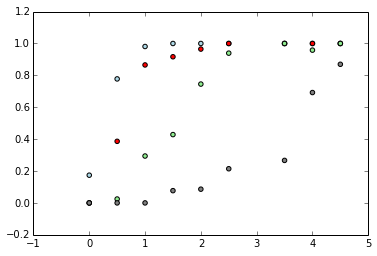

In [2]:
colorlist = ['lightblue','red','lightgreen','gray']
vaccination = 0
for color in colorlist:  
    
    RandIdict = []

    population = 500
    probofconnlist = [.001,.005,.00333,.0025,.002]
    for y in probofconnlist:
        for something in range(5):
            plist = [.05,.1,.2,.4,.6]
            klist = [1,2,4,7]
            for p in plist:
                for k in klist:
                    prams = params.Params(k,p,population,y,vaccination*population)
                    g = graph.Graph(prams,clustered=True)
                    g.update()
                    r = g.calculateR(True)
                    i = g.getR()
                    RandIdict = RandIdict + [[r, float(i),population]]

        population += 500
        print('im going')


    #for item in RandIdict:
    #   print(item[0],item[2])
    #Rlist = RandIdict.keys()


    stepsize = .5
    leftbound = 0
    itemtotallist = [0]*10
    itemabovelist = [0]*10
    for x in range(10):
        for item in RandIdict:
            if item[0] >= leftbound and item[0] < (leftbound + stepsize):
                itemtotallist[x] = itemtotallist[x] + 1
                if item[1] > .03*item[2]:
                    itemabovelist[x] = itemabovelist[x] + 1

        leftbound = (leftbound + stepsize)

    propdict = {}
    for x in range(10):
        if itemtotallist[x] != 0:
            propdict[x*.5] = float(itemabovelist[x])/float(itemtotallist[x])  

    print(propdict)

    keylist = []
    valuelist = []
    for key in propdict:
        keylist = keylist + [key]
        valuelist = valuelist + [propdict[key]]

    plt.scatter(keylist,valuelist, c=color)
    
    vaccination += .2


